In [2]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data = data.drop(columns=['Outcome'],axis=1)

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
# Convert the Data into Standard Scaler Form
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)

In [14]:
dataScaled = pd.DataFrame(dataScaled)
dataScaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [16]:
dataScaled.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [18]:
dataScaled.shape

(768, 8)

In [20]:
covarianceMatrix = dataScaled.T @ dataScaled / 767
covarianceMatrix

,0,1,2,3,4,5,6,7
0,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051
1,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858
2,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840
3,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119
4,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218
5,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289
6,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605
7,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304


In [22]:
eigenValues, eigenVectors = np.linalg.eig(covarianceMatrix)


In [24]:
eigenValues

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

In [26]:
eigenVectors

array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

In [28]:
# PC1 data
PC1_data = dataScaled @ eigenVectors[:,0]
PC1_data

0     -1.068503
1      1.121683
2      0.396477
3      1.115781
4     -2.359334
         ...   
763   -1.562085
764    0.100405
765    0.283475
766    1.060324
767    0.839892
Length: 768, dtype: float64

In [30]:
# PC2 data
PC2_data = dataScaled @ eigenVectors[:,1]
PC2_data

0     -1.234895
1      0.733852
2     -1.595876
3      1.271241
4      2.184819
         ...   
763   -1.923150
764    0.614181
765   -0.097065
766   -0.837062
767    1.151755
Length: 768, dtype: float64

In [32]:
# PC3 data
PC3_data = dataScaled @ eigenVectors[:,7]
PC3_data

0     -0.095930
1      0.712938
2     -1.760678
3      0.663729
4     -2.963107
         ...   
763    0.867408
764    0.764353
765    0.077192
766   -0.425030
767    1.009178
Length: 768, dtype: float64

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(dataScaled)

array([[ 1.06850273,  1.23489499],
       [-1.12168331, -0.73385167],
       [-0.39647671,  1.59587594],
       ...,
       [-0.28347525,  0.09706503],
       [-1.06032431,  0.83706234],
       [-0.83989172, -1.15175485]])

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponent = pca.fit_transform(dataScaled) 

In [38]:
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

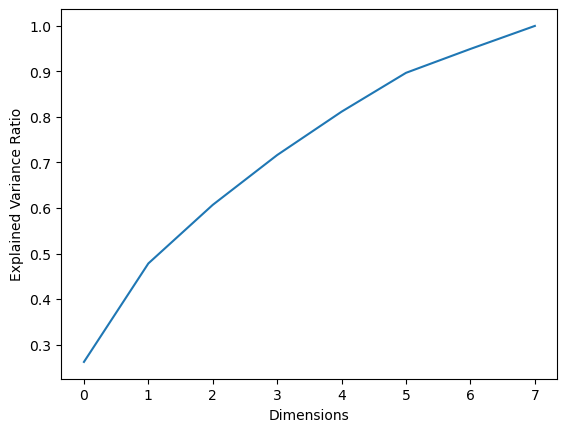

In [40]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.savefig("ScreenPlot.png")
plt.show()